th2881

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential()
        # create a CNN model
        model.add(Conv2D(64, (5, 5), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))
        model.add(Conv2D(32, (2, 2), strides=1, activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2), 2, padding='same'))

        model.add(Flatten())

        model.add(Dense(units=512,activation='relu'))
        model.add(Dropout(rate=0.25))
        model.add(Dense(units=25,activation='softmax'))

        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

        self.model = model
        print(self.model.summary())

    def input_preprocess(self, input):
        input = input.reshape(input.shape[0], 28, 28, 1)
        input = input.astype('float32')
        input /= 255
        return input


    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)
        X_train = self.input_preprocess(X_train)
        X_test = self.input_preprocess(X_test)


        # one hot
        y_train = to_categorical(y_train, num_classes=25)
        y_test = to_categorical(y_test, num_classes=25)

        print("X_train.shape: ", X_train.shape)
        print("y_train.shape: ", y_train.shape)
        print("X_test.shape: ", X_test.shape)
        print("y_test.shape: ", y_test.shape)



        self.data = {
            "train": (X_train, y_train), # (x_train, y_train)
            "test" : (X_test, y_test), # (x_test, y_test)
        }

    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        # TODO: Use model.fit() to train the model

        history = self.model.fit(self.data["train"][0], self.data["train"][1],
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 verbose=verbose,
                                 validation_data=(self.data["test"][0], self.data["test"][1]))
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data = self.input_preprocess(data)
        predictions = self.model.predict(data)
        predicted_labels = np.argmax(predictions, axis=1)

        return predicted_labels



    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
# luke test
#train = pd.read_csv('train.csv')
#print(train.describe())

In [5]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 512)               8

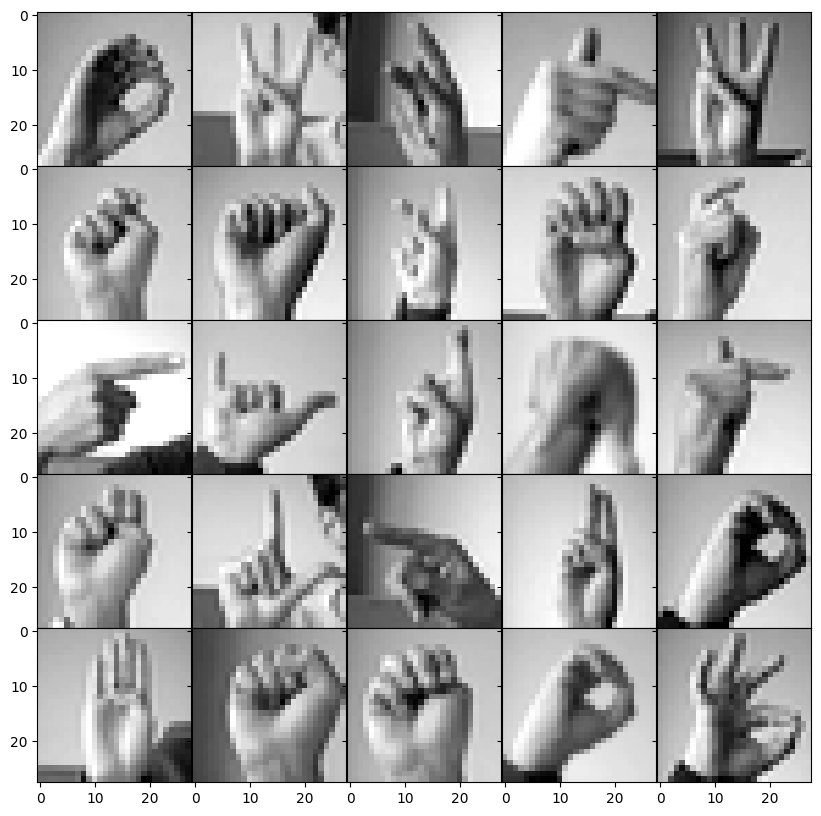

In [6]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 9s 10ms/step - loss: 1.4385 - accuracy: 0.5724 - val_loss: 0.3681 - val_accuracy: 0.8915
Epoch 2/30
172/172 [==============================] - 1s 6ms/step - loss: 0.2432 - accuracy: 0.9251 - val_loss: 0.0872 - val_accuracy: 0.9800
Epoch 3/30
172/172 [==============================] - 1s 6ms/step - loss: 0.0759 - accuracy: 0.9818 - val_loss: 0.0216 - val_accuracy: 0.9987
Epoch 4/30
172/172 [==============================] - 1s 7ms/step - loss: 0.0262 - accuracy: 0.9954 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 5/30
172/172 [==============================] - 1s 6ms/step - loss: 0.0135 - accuracy: 0.9982 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/30
172/172 [==============================] - 1s 8ms/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/30
172/172 [==============================] - 1s 7ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch

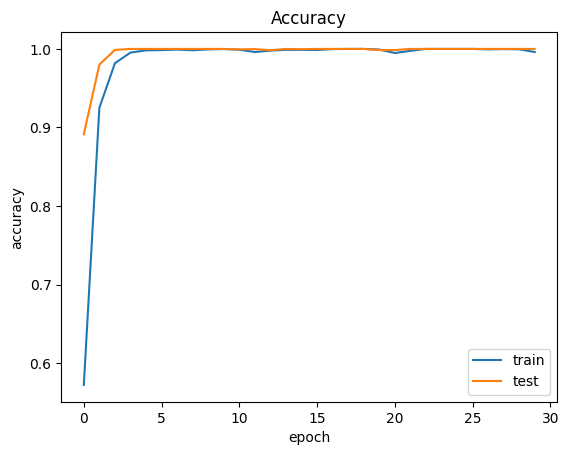

In [7]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [8]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 3ms/step
0.9411600669269381
